

*   **Nama: SALMA NATASYA AZZAHRA**
*   **No.Regist: 1494037162100-243**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import library
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [29]:
# Read datasets
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding/all_stocks_1yr.csv')
df = df.drop(columns=['Open','High','Low','Volume','Name'])
df

,Date,Close
0,2016-08-12,180.27
1,2016-08-15,180.56
2,2016-08-16,179.25
3,2016-08-17,179.87
4,2016-08-18,179.18
...,...,...
126212,2017-08-07,61.83
126213,2017-08-08,60.00
126214,2017-08-09,60.81
126215,2017-08-10,59.74


In [30]:
# Normalization
df["Close"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()
df

,Date,Close
0,2016-08-12,0.721033
1,2016-08-15,0.723467
2,2016-08-16,0.712470
3,2016-08-17,0.717675
4,2016-08-18,0.711883
...,...,...
126212,2017-08-07,-0.273218
126213,2017-08-08,-0.288580
126214,2017-08-09,-0.281780
126215,2017-08-10,-0.290762


In [31]:
#Checking for null values
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [32]:
# Threshold
threshold_mae = (df['Close'].max() - df['Close'].min()) * 10/100
threshold_mae

1.716567529689563

In [33]:
# Divide the data into training data and testing data
date = df['Date'].values
close = df['Close'].values
date_train, date_test, close_train, close_test = train_test_split(date, close, test_size=0.2, shuffle=False)


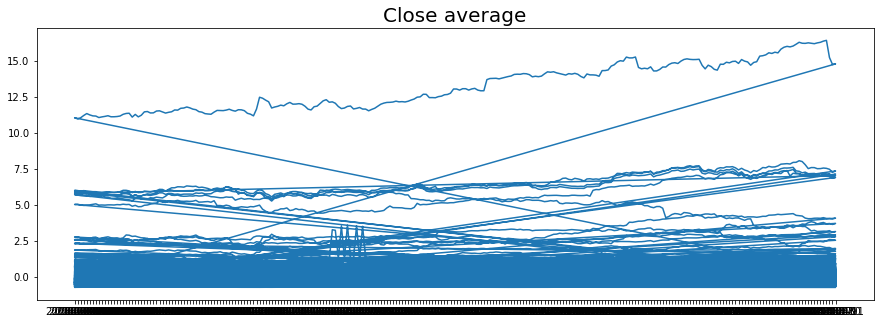

In [34]:
# Plot Close Average
plt.figure(figsize=(15,5))
plt.plot(date_train, close_train)
plt.title('Close average',
          fontsize=20);

In [35]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
train_set = windowed_dataset(close_train, window_size=80, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [36]:
#Optimizer
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=30)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


12/12 [==============================] - 9s 44ms/step - loss: 0.0059 - mae: 0.0739
Epoch 2/30
12/12 [==============================] - 1s 34ms/step - loss: 0.0063 - mae: 0.0767
Epoch 3/30
12/12 [==============================] - 0s 25ms/step - loss: 0.0062 - mae: 0.0768
Epoch 4/30
12/12 [==============================] - 0s 22ms/step - loss: 0.0060 - mae: 0.0755
Epoch 5/30
12/12 [==============================] - 0s 20ms/step - loss: 0.0057 - mae: 0.0754
Epoch 6/30
12/12 [==============================] - 0s 19ms/step - loss: 0.0061 - mae: 0.0754
Epoch 7/30
12/12 [==============================] - 0s 20ms/step - loss: 0.0063 - mae: 0.0771
Epoch 8/30
12/12 [==============================] - 0s 20ms/step - loss: 0.0058 - mae: 0.0741
Epoch 9/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0054 - mae: 0.0720
Epoch 10/30
12/12 [==============================] - 0s 21ms/step - loss: 0.0051 - mae: 0.0727
Epoch 11/30
12/12 [==============================] - 0s 22ms/step - lo

Epoch 1/30


ValueError: ignored